# Importing Necessory Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Importing Dataset

In [2]:
df = pd.read_csv("house.csv")

## Preprocessing Steps and Exploring Dataset

In [3]:
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [4]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [5]:
df.tail()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
995,3261,4,1,1978,2.165110,2,10,701493.997069
996,3179,1,2,1999,2.977123,1,10,683723.160704
997,2606,4,2,1962,4.055067,0,2,572024.023634
998,4723,5,2,1950,1.930921,0,7,964865.298639
999,3268,4,2,1983,3.108790,2,2,742599.253332


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [7]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [8]:
df.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

In [9]:
df.shape

(1000, 8)

In [10]:
df['Num_Bedrooms']

0      2
1      3
2      1
3      1
4      2
      ..
995    4
996    1
997    4
998    5
999    4
Name: Num_Bedrooms, Length: 1000, dtype: int64

In [11]:
df['Num_Bedrooms'].unique()

array([2, 3, 1, 5, 4], dtype=int64)

In [12]:
df['Num_Bedrooms'].nunique()

5

In [13]:
df['Num_Bathrooms'].nunique()

3

In [14]:
df['Num_Bathrooms'].unique()

array([1, 3, 2], dtype=int64)

In [15]:
df.nunique()

Square_Footage           894
Num_Bedrooms               5
Num_Bathrooms              3
Year_Built                73
Lot_Size                1000
Garage_Size                3
Neighborhood_Quality      10
House_Price             1000
dtype: int64

In [16]:
df.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [17]:
print(df.loc[5])
print(" ")
type(df.loc[5])

Square_Footage            3944.000000
Num_Bedrooms                 5.000000
Num_Bathrooms                3.000000
Year_Built                1990.000000
Lot_Size                     2.475930
Garage_Size                  2.000000
Neighborhood_Quality         8.000000
House_Price             879796.983522
Name: 5, dtype: float64
 


pandas.core.series.Series

# Handle missing values

In [18]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Removing Outliers

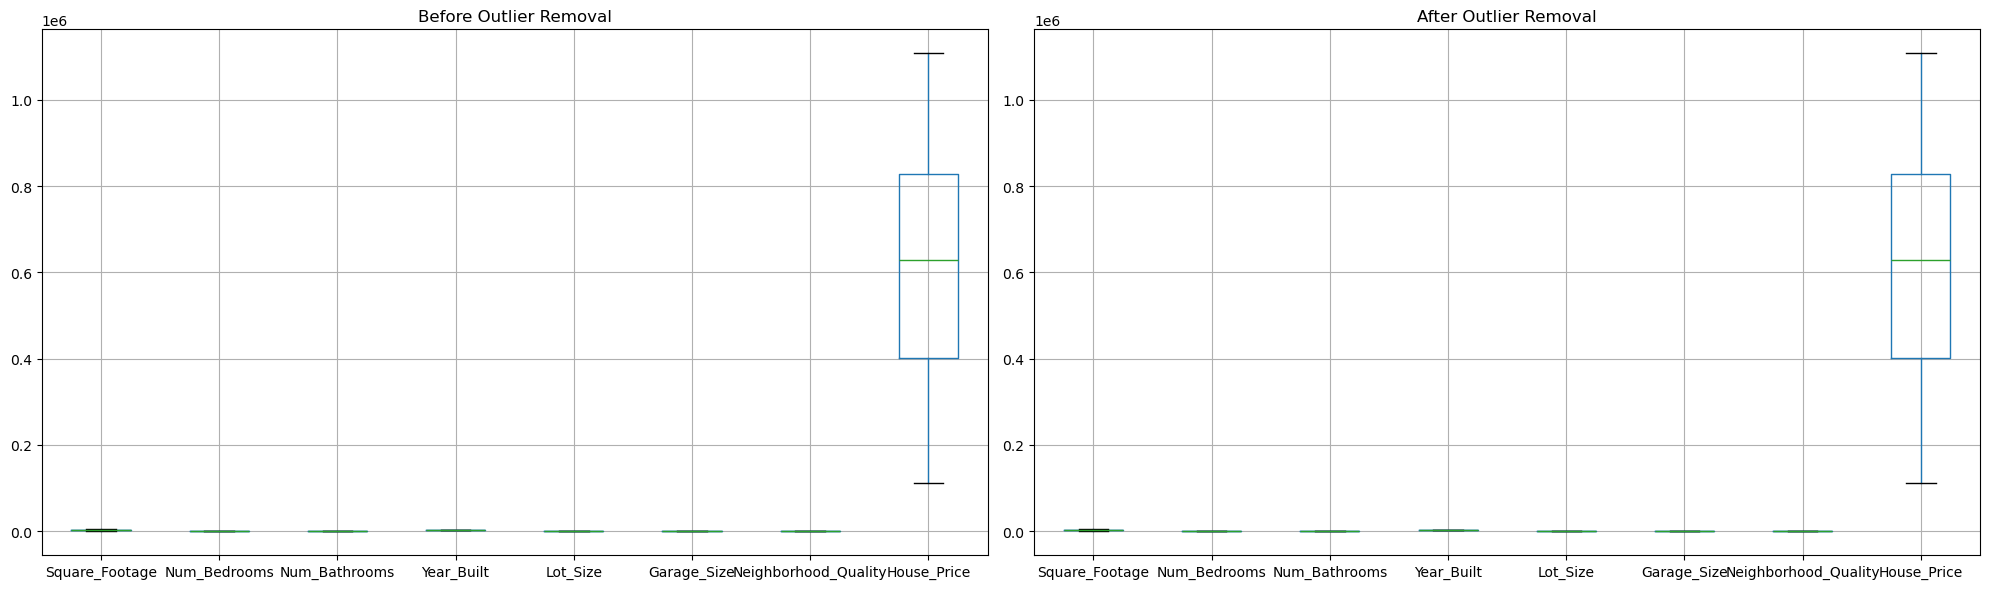

In [19]:
numeric_cols = df_imputed.select_dtypes(include=[np.number])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
numeric_cols.boxplot()
plt.title("Before Outlier Removal")

plt.subplot(1, 2, 2)
df_cleaned.select_dtypes(include=[np.number]).boxplot()
plt.title("After Outlier Removal")

plt.tight_layout()
plt.show()

## Standardize data

In [20]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cleaned.drop('House_Price', axis=1))
X = pd.DataFrame(scaled_features, columns=df.columns[:-1])
y = df_cleaned['House_Price']

## Spliting dataset

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Training

### Linear Regression

In [22]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)


### DesicionTree Regression

In [23]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)


### Model Evaluation

In [24]:
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Evaluation:")
    print(f"  MAE:  {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"  MSE:  {mean_squared_error(y_true, y_pred):.2f}")
    print(f"  RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"  R2:   {r2_score(y_true, y_pred):.2f}")
    print("-" * 40)

evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Decision Tree", y_test, dt_preds)


Linear Regression Evaluation:
  MAE:  8174.58
  MSE:  101434798.51
  RMSE: 10071.48
  R2:   1.00
----------------------------------------
Decision Tree Evaluation:
  MAE:  24045.32
  MSE:  966529097.47
  RMSE: 31089.05
  R2:   0.99
----------------------------------------


### Final Output

In [25]:
sample_input = X_test.iloc[[0]]
predicted_price = lr_model.predict(sample_input)[0]
print(f"Predicted House Price: ${predicted_price:.2f}")


Predicted House Price: $868687.11
